In [82]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV , LassoCV , ElasticNetCV , ElasticNet
from sklearn.metrics import r2_score

In [2]:
with open('Datasets/variable_map.pickle','rb') as handle:
    var_map = pickle.load(handle)

In [3]:
with open('Datasets/variable_descriptions.pickle','rb') as handle:
    var_des = pickle.load(handle)

In [4]:
with open('/Users/ishareef7/Springboard/Capstone1/Datasets/recs.pickle','rb') as handle:
    recs = pickle.load(handle)

In [5]:
with open('/Users/ishareef7/Springboard/Capstone1/Datasets/data_info.pickle','rb') as handle:
    data_info = pickle.load(handle)

In [6]:
recs_features = recs.loc[:,data_info.feature]

In [7]:
cat_mask = data_info.data_type == 'CATEGORICAL'
cat_features  = recs.loc[:,cat_mask]
cat_dummies = pd.get_dummies(cat_features, drop_first = True, columns = cat_features.columns)
cat_dummies.columns = [var.replace('.0','').replace('-','n') for var in cat_dummies.columns]
recs_dummies =  pd.concat([recs_features.loc[:,np.invert(cat_mask)], cat_dummies,recs['NWEIGHT'],recs['TOTALBTU']], axis =1)

In [8]:
features = list(recs_dummies.columns)[:-2]
feature_var_str = ' + '.join(features)
prediction_str = 'TOTALBTU ~ ' + feature_var_str 

In [9]:
X = recs_dummies.iloc[:,:-2]
y = recs_dummies['TOTALBTU']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 7)

## Ordinary Least Squares Regression Model

In [10]:
ols_model = ols(prediction_str + '-1',pd.concat([X_train,y_train], axis =1))
ols_results = ols_model.fit()
print(ols_results.summary())

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:               TOTALBTU   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     21.26
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:22:05   Log-Likelihood:                -52091.
No. Observations:                4548   AIC:                         1.054e+05
Df Residuals:                    3957   BIC:                         1.092e+05
Df Model:                         590                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
BEDROOMS               529.2865 

In [11]:
print("OLS Test Set R-Squared =", r2_score(y_test, ols_results.predict(X_test)))

OLS Test Set R-Squared = 0.6899768311096363


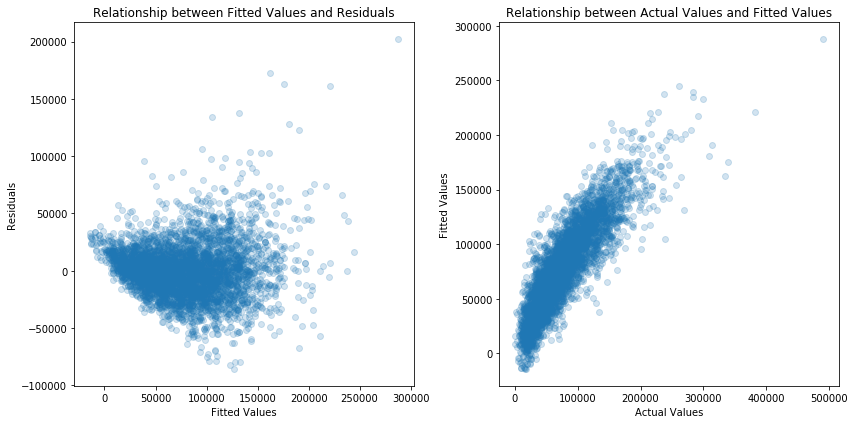

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1.scatter(ols_results.fittedvalues, ols_results.resid, alpha = 0.2)
ax1.set(xlabel= "Fitted Values", ylabel= "Residuals", 
        title = "Relationship between Fitted Values and Residuals")


ax2.scatter(y_train, ols_results.fittedvalues, alpha = 0.2)
ax2.set(xlabel= "Actual Values", ylabel= "Fitted Values", 
        title = "Relationship between Actual Values and Fitted Values")
_ = plt.tight_layout()

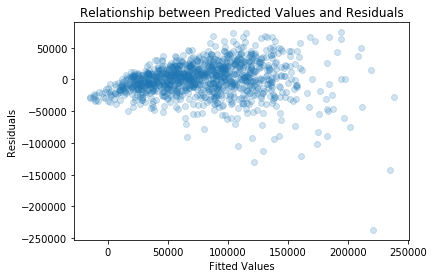

In [13]:
predicted = ols_results.predict(X_test)
residuals = predicted - y_test

plt.scatter(predicted, residuals, alpha = 0.2)
plt.ylabel("Residuals")
plt.xlabel("Fitted Values")
_ = plt.title("Relationship between Predicted Values and Residuals")

In [30]:
recs_dummies_otliers = recs_dummies.drop(ols_results.resid[ols_results.resid>125000].index)

X2 = recs_dummies_otliers.iloc[:,:-2]
y2 = recs_dummies_otliers['TOTALBTU']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = .2, random_state = 7)

## Ordinary Least Squares Regression Model 2 (Outliers Removed)

In [31]:
ols_model2 = ols(prediction_str + '-1',pd.concat([X_train2,y_train2], axis =1))
ols_results2 = ols_model2.fit()
print(ols_results2.summary())

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:               TOTALBTU   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     22.44
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:31:39   Log-Likelihood:                -51859.
No. Observations:                4543   AIC:                         1.049e+05
Df Residuals:                    3953   BIC:                         1.087e+05
Df Model:                         589                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
BEDROOMS               561.2745 

In [32]:
print("OLS Test Set R-Squared (Dropped Outliers) =", r2_score(y_test2, ols_results2.predict(X_test2)))

OLS Test Set R-Squared (Dropped Outliers) = 0.6911170143926109


## Ridge Regression Model w/CV

In [41]:
alpha_ridge = [1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge_model = RidgeCV(alphas = alpha_ridge, fit_intercept = False, cv = 5,)
#weights = recs['NWEIGHT'][X_train.index]
ridge_model.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01]),
    cv=5, fit_intercept=False, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [42]:
print("Ridge Regression Test Set R-Squared =", ridge_model.score(X_test,y_test))

Ridge Regression Test Set R-Squared = 0.6990700862850918


## Ridge Regression Model w/CV (Outliers Removed)

In [43]:
ridge_model2 = RidgeCV(alphas = alpha_ridge, fit_intercept = False, cv = 5)
#weights = recs['NWEIGHT'][X_train.index]
ridge_model2.fit(X_train2, y_train2)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e+00, 5.e+00, 1.e+01, 2.e+01]),
    cv=5, fit_intercept=False, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [44]:
print("Ridge Regression Test Set R-Squared (Dropped Outliers) =", ridge_model2.score(X_test2,y_test2))

Ridge Regression Test Set R-Squared = 0.7449520071291978


## Lasso Regression Model w/CV

In [67]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

lasso_model = LassoCV(alphas = alpha_lasso, fit_intercept = False, cv = 5, random_state = 7)
#weights = recs['NWEIGHT'][X_train.index]
lasso_model.fit(X_train, y_train)

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    copy_X=True, cv=5, eps=0.001, fit_intercept=False, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=7, selection='cyclic', tol=0.0001,
    verbose=False)

In [68]:
print("Lasso Regression Test Set R-Squared =", lasso_model.score(X_test,y_test))

Lasso Regression Test Set R-Squared = 0.6990700862850918


## Lasso Regression Model w/CV (Outliers Removed)

In [63]:
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,1000]

lasso_model2 = LassoCV(alphas = alpha_lasso, fit_intercept = False, cv = 5, random_state = 7)
#weights = recs['NWEIGHT'][X_train.index]
lasso_model2.fit(X_train2, y_train2)

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10, 1000],
    copy_X=True, cv=5, eps=0.001, fit_intercept=False, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [75]:
print("Lasso Regression Test Set R-Squared (Dropped Outliers) =", lasso_model2.score(X_test2,y_test2))

Lasso Regression Test Set R-Squared (Dropped Outliers) = 0.7314082227800851


## Elastic Net Model w/CV

In [93]:
alpha_elastic = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,1000]
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]


elastic_model = ElasticNetCV(l1_ratio = l1_ratio, alphas = alpha_elastic, fit_intercept = False, cv = 5, random_state = 7)
#weights = recs['NWEIGHT'][X_train.index]
elastic_model.fit(X_train, y_train)

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/ishareef7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Obje

ElasticNetCV(alphas=[100, 1000], copy_X=True, cv=5, eps=0.001,
       fit_intercept=False, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=7,
       selection='cyclic', tol=0.0001, verbose=0)

In [92]:
print("ElasticNet Regression Test Set R-Squared =", elastic_model.score(X_test,y_test))

ElasticNet Regression Test Set R-Squared = 0.6898150911547216
